In [1]:
def modcrop(image, scale):
    size = np.array(image.shape)
    size -= size % scale
    image = image[:size[0], :size[1]]
    return image

In [2]:
import h5py
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(233)
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.preprocessing.image import list_pictures
from scipy.misc import imresize


# settings
folder = '../data/Train'
savepath = 'train.h5'
size_input = 33
size_label = 21
scale = 3
stride = 14

# initialization
data = []
label = []
padding = abs(size_input - size_label) // 2
count = 0

# generate data
filepaths = list_pictures(folder, ext='bmp')

for path in filepaths:
    image = load_img(path)
    image = image.convert('YCbCr')
    image = img_to_array(image)[:, :, 1]
    
    im_label = modcrop(image, scale)
    hei, wid = im_label.shape
    size = np.array(im_label.shape)
    im_input = imresize(imresize(im_label, size // scale, 'bicubic'),
                        size, 'bicubic')
    
    for x in range(0, hei - size_input, stride):
        for y in range(0, wid - size_input, stride):
            subim_input = im_input[x : x + size_input, y : y + size_input]
            subim_label = im_label[x + padding : x + padding + size_label,
                                   y + padding : y + padding + size_label]
            data += [subim_input]
            label += [subim_label]

order = np.random.permutation(len(data))
data = np.stack(data)[order]
label = np.stack(label)[order]

with h5py.File(savepath, 'w') as f:
    f.create_dataset('dat', data=data)
    f.create_dataset('lab', data=label)

Using TensorFlow backend.


(21712, 33, 33)
(21712, 21, 21)


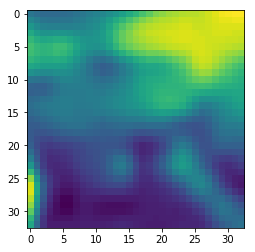

In [3]:
print(data.shape)
print(label.shape)
plt.imshow(data[0, :, :])
plt.show()